In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as tsa



# 2 Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias 

In [47]:
#agbarometer

df_agbarometer = pd.read_csv('../data/clean_data/agbarometer_cleaned.csv')
print(df_agbarometer.head(10))

     Bimestre  CondicIones presentes  Expectativas futuras  Ag Barometer
0  2018-11-01                     43                   130            95
1  2019-01-01                     59                   137           106
2  2019-03-01                     69                   126           103
3  2019-05-01                     82                   141           117
4  2019-07-01                    105                   158           137
5  2019-09-01                     64                    80            74
6  2019-11-01                     64                    64            64
7  2020-01-01                     46                    56            52
8  2020-04-01                     50                    54            53
9  2020-07-01                     52                    45            48


In [48]:
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bimestre               41 non-null     object
 1   CondicIones presentes  41 non-null     int64 
 2   Expectativas futuras   41 non-null     int64 
 3   Ag Barometer           41 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [49]:
print(df_agbarometer['Bimestre'].head())

0    2018-11-01
1    2019-01-01
2    2019-03-01
3    2019-05-01
4    2019-07-01
Name: Bimestre, dtype: object


In [50]:
df_agbarometer['Bimestre'] = pd.to_datetime(df_agbarometer['Bimestre'], format='%Y-%m-%d')
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bimestre               41 non-null     datetime64[ns]
 1   CondicIones presentes  41 non-null     int64         
 2   Expectativas futuras   41 non-null     int64         
 3   Ag Barometer           41 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 KB


In [51]:
df_agbarometer.set_index('Bimestre', inplace=True)
df_agbarometer.head()

,CondicIones presentes,Expectativas futuras,Ag Barometer
Bimestre,,,
2018-11-01,43,130,95
2019-01-01,59,137,106
2019-03-01,69,126,103
2019-05-01,82,141,117
2019-07-01,105,158,137


In [52]:
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-01 to 2025-09-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CondicIones presentes  41 non-null     int64
 1   Expectativas futuras   41 non-null     int64
 2   Ag Barometer           41 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [53]:
data1 = df_agbarometer['Ag Barometer']

In [ ]:
# Valores para interpolar
valor_2020_01_01 = data1.loc['2020-01-01'] 
valor_2020_04_01 = data1.loc['2020-04-01'] 
valor_2020_07_01 = data1.loc['2020-07-01'] 

# Calcular los promedios
valor_promedio_2020_03_01 = (valor_2020_01_01 + valor_2020_04_01) / 2 

valor_promedio_2020_05_01 = (valor_2020_04_01 + valor_2020_07_01) / 2 

# Agregar los datos
fecha_a_insertar_1 = pd.to_datetime('2020-03-01')
fecha_a_insertar_2 = pd.to_datetime('2020-05-01')

data1.loc[fecha_a_insertar_1] = valor_promedio_2020_03_01
data1.loc[fecha_a_insertar_2] = valor_promedio_2020_05_01

# Eliminar dato de abril
fecha_a_eliminar = pd.to_datetime('2020-04-01')
data1 = data1.drop(fecha_a_eliminar)

# Ordenar la Serie por índice 
data1 = data1.sort_index()
print(data1.loc['2019-11-01':'2020-11-01'])

--- Serie 'data1' (Ag Barometer) actualizada y ordenada ---
Bimestre
2019-11-01    64.0
2020-01-01    52.0
2020-03-01    52.5
2020-05-01    50.5
2020-07-01    48.0
2020-09-01    69.0
2020-11-01    78.0
Name: Ag Barometer, dtype: float64


In [75]:
# Asignamos frecuencia bimestral
data1 = data1.asfreq('2MS')

# Corroboramos que la frecuencia sea bimestral
print(data1.index)

DatetimeIndex(['2018-11-01', '2019-01-01', '2019-03-01', '2019-05-01',
               '2019-07-01', '2019-09-01', '2019-11-01', '2020-01-01',
               '2020-03-01', '2020-05-01', '2020-07-01', '2020-09-01',
               '2020-11-01', '2021-01-01', '2021-03-01', '2021-05-01',
               '2021-07-01', '2021-09-01', '2021-11-01', '2022-01-01',
               '2022-03-01', '2022-05-01', '2022-07-01', '2022-09-01',
               '2022-11-01', '2023-01-01', '2023-03-01', '2023-05-01',
               '2023-07-01', '2023-09-01', '2023-11-01', '2024-01-01',
               '2024-03-01', '2024-05-01', '2024-07-01', '2024-09-01',
               '2024-11-01', '2025-01-01', '2025-03-01', '2025-05-01',
               '2025-07-01', '2025-09-01'],
              dtype='datetime64[ns]', name='Bimestre', freq='2MS')


In [76]:
# Dividimos en train y test
# Seleccionamos el primer 90% para train
train1 = data1.iloc[:round(len(data1)*.9)]
# Seleccionamos el 10% restante para test
test1 = data1.iloc[round(len(data1)*.9):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train1, test1)

Bimestre
2018-11-01     95.0
2019-01-01    106.0
2019-03-01    103.0
2019-05-01    117.0
2019-07-01    137.0
2019-09-01     74.0
2019-11-01     64.0
2020-01-01     52.0
2020-03-01     52.5
2020-05-01     50.5
2020-07-01     48.0
2020-09-01     69.0
2020-11-01     78.0
2021-01-01     79.0
2021-03-01     90.0
2021-05-01     79.0
2021-07-01     69.0
2021-09-01     79.0
2021-11-01     79.0
2022-01-01     90.0
2022-03-01     90.0
2022-05-01     98.0
2022-07-01     76.0
2022-09-01     83.0
2022-11-01     67.0
2023-01-01     68.0
2023-03-01     69.0
2023-05-01     84.0
2023-07-01     89.0
2023-09-01    100.0
2023-11-01    117.0
2024-01-01    119.0
2024-03-01    129.0
2024-05-01    139.0
2024-07-01    139.0
2024-09-01    132.0
2024-11-01    149.0
2025-01-01    117.0
Freq: 2MS, Name: Ag Barometer, dtype: float64 Bimestre
2025-03-01    137.0
2025-05-01    130.0
2025-07-01    127.0
2025-09-01    124.0
Freq: 2MS, Name: Ag Barometer, dtype: float64


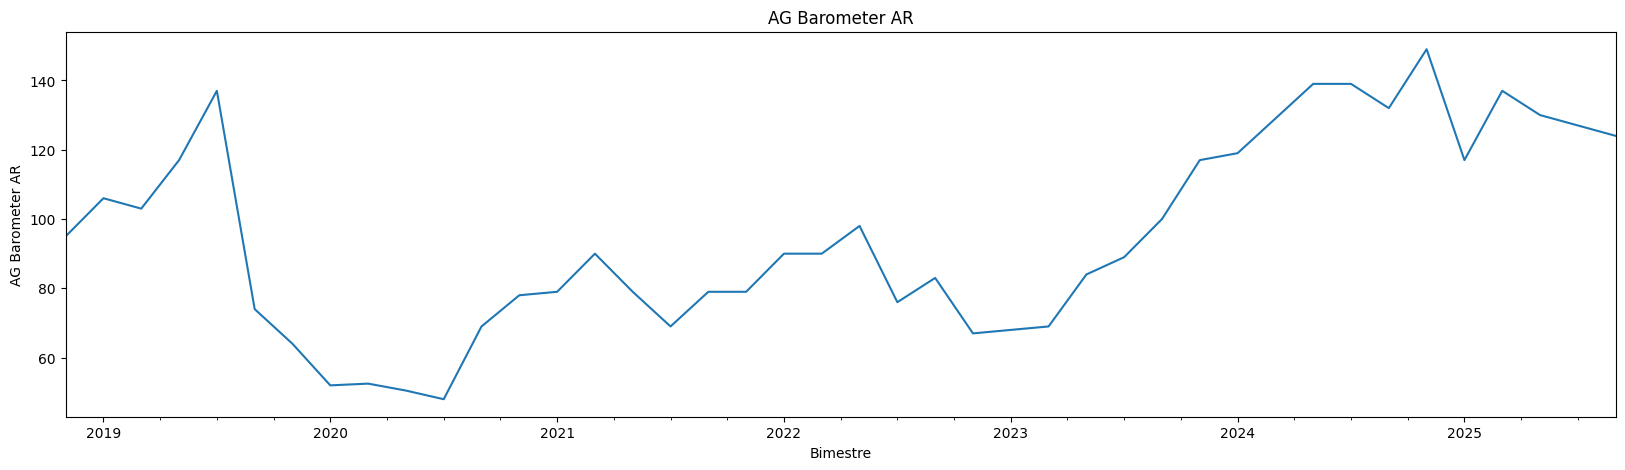

In [74]:
data1.plot(figsize=(20,5), title = "AG Barometer AR", ylabel = "AG Barometer AR", xlabel = "Bimestre")
plt.show()

In [56]:
#ageconomy

df_ageconomy = pd.read_csv('../data/clean_data/AgEconomyBarometer_cleaned.csv')
print(df_ageconomy.head())

      Month  Year  Purdue/CME Ag Economy Barometer  \
0   October  2015                              116   
1  November  2015                               97   
2  December  2015                              107   
3   January  2016                               98   
4  February  2016                               96   

   Index of Current Conditions  Index of Future Expectations  \
0                          118                           116   
1                           98                            97   
2                          125                            98   
3                           99                            98   
4                           82                           102   

   Farm Capital Investment Index  
0                             67  
1                             51  
2                             75  
3                             52  
4                             56  


In [57]:
df_ageconomy['Date'] = df_ageconomy['Year'].astype(str) + '-' + df_ageconomy['Month'].astype(str).str.zfill(2) + '-01'
df_ageconomy['Date'] = pd.to_datetime(df_ageconomy['Date'])

In [58]:
df_ageconomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month                            121 non-null    object        
 1   Year                             121 non-null    int64         
 2   Purdue/CME Ag Economy Barometer  121 non-null    int64         
 3   Index of Current Conditions      121 non-null    int64         
 4   Index of Future Expectations     121 non-null    int64         
 5   Farm Capital Investment Index    121 non-null    int64         
 6   Date                             121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 6.7+ KB


In [59]:
df_ageconomy.set_index('Date', inplace=True)
df_ageconomy.head()

,Month,Year,Purdue/CME Ag Economy Barometer,Index of Current Conditions,Index of Future Expectations,Farm Capital Investment Index
Date,,,,,,
2015-10-01,October,2015,116,118,116,67
2015-11-01,November,2015,97,98,97,51
2015-12-01,December,2015,107,125,98,75
2016-01-01,January,2016,98,99,98,52
2016-02-01,February,2016,96,82,102,56


In [60]:
data2 = df_ageconomy['Purdue/CME Ag Economy Barometer']

In [77]:
# Asignamos frecuencia mensual
data2 = data2.asfreq('MS')

# Corroboramos que la frecuencia sea mensual
print(data2.index)

DatetimeIndex(['2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01',
               ...
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01'],
              dtype='datetime64[ns]', name='Date', length=121, freq='MS')


In [78]:
# Dividimos en train y test
# Seleccionamos el primer 80% para train
train2 = data2.iloc[:round(len(data2)*.8)]
# Seleccionamos el 20% restante para test
test2 = data2.iloc[round(len(data2)*.8):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train2, test2)

Date
2015-10-01    116
2015-11-01     97
2015-12-01    107
2016-01-01     98
2016-02-01     96
             ... 
2023-06-01    121
2023-07-01    123
2023-08-01    115
2023-09-01    106
2023-10-01    110
Freq: MS, Name: Purdue/CME Ag Economy Barometer, Length: 97, dtype: int64 Date
2023-11-01    115
2023-12-01    114
2024-01-01    106
2024-02-01    111
2024-03-01    114
2024-04-01     99
2024-05-01    108
2024-06-01    105
2024-07-01    113
2024-08-01    100
2024-09-01     88
2024-10-01    115
2024-11-01    145
2024-12-01    136
2025-01-01    141
2025-02-01    152
2025-03-01    140
2025-04-01    148
2025-05-01    158
2025-06-01    146
2025-07-01    135
2025-08-01    125
2025-09-01    126
2025-10-01    129
Freq: MS, Name: Purdue/CME Ag Economy Barometer, dtype: int64


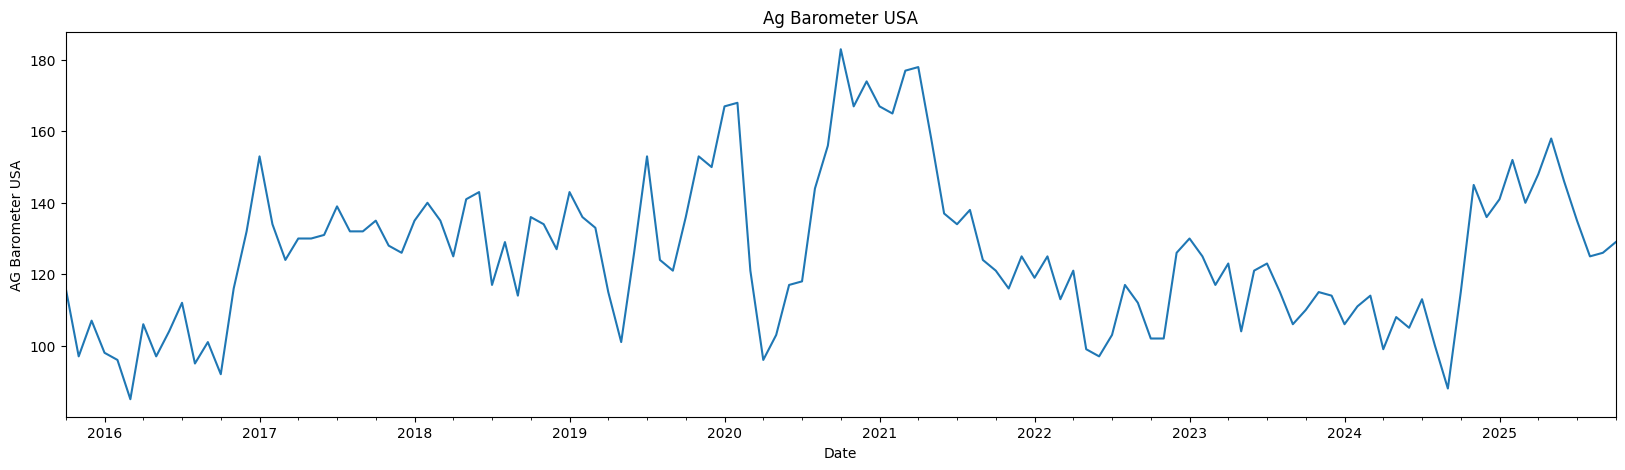

In [61]:
data2.plot(figsize=(20,5), title = "Ag Barometer USA", ylabel = "AG Barometer USA", xlabel = "Date")
plt.show()

In [62]:
#ICG UTDT

df_ICG = pd.read_csv('../data/clean_data/ICG_cleaned.csv')
print(df_ICG.head())

  indicator        date  value
0       ICG  2001-11-01  1.036
1       ICG  2001-12-01  0.757
2       ICG  2002-01-01  1.357
3       ICG  2002-02-01  0.983
4       ICG  2002-03-01  0.862


In [63]:
df_ICG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicator  288 non-null    object 
 1   date       288 non-null    object 
 2   value      288 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.9+ KB


In [64]:
df_ICG['date'] = pd.to_datetime(df_ICG['date'], format='%Y-%m-%d')
df_ICG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   indicator  288 non-null    object        
 1   date       288 non-null    datetime64[ns]
 2   value      288 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.9+ KB


In [65]:
df_ICG.set_index('date', inplace=True)
print(df_ICG.head())

           indicator  value
date                       
2001-11-01       ICG  1.036
2001-12-01       ICG  0.757
2002-01-01       ICG  1.357
2002-02-01       ICG  0.983
2002-03-01       ICG  0.862


In [66]:
data3 = df_ICG['value']

In [80]:
# Asignamos frecuencia mensual
data3 = data3.asfreq('MS')

# Corroboramos que la frecuencia sea mensual
print(data3.index)

DatetimeIndex(['2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01',
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01',
               ...
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01'],
              dtype='datetime64[ns]', name='date', length=288, freq='MS')


In [81]:
# Dividimos en train y test
# Seleccionamos el primer 80% para train
train3 = data3.iloc[:round(len(data3)*.8)]
# Seleccionamos el 20% restante para test
test3 = data3.iloc[round(len(data3)*.8):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train3, test3)

date
2001-11-01    1.036000
2001-12-01    0.757000
2002-01-01    1.357000
2002-02-01    0.983000
2002-03-01    0.862000
                ...   
2020-08-01    2.377858
2020-09-01    2.265969
2020-10-01    1.992344
2020-11-01    2.019343
2020-12-01    1.853868
Freq: MS, Name: value, Length: 230, dtype: float64 date
2021-01-01    1.875130
2021-02-01    1.816565
2021-03-01    1.783856
2021-04-01    1.732998
2021-05-01    1.932057
2021-06-01    1.703405
2021-07-01    1.698242
2021-08-01    1.852228
2021-09-01    1.579328
2021-10-01    1.524077
2021-11-01    1.453584
2021-12-01    1.422823
2022-01-01    1.543808
2022-02-01    1.494021
2022-03-01    1.507731
2022-04-01    1.436073
2022-05-01    1.303236
2022-06-01    1.401616
2022-07-01    1.116667
2022-08-01    1.182577
2022-09-01    1.230554
2022-10-01    1.281745
2022-11-01    1.189553
2022-12-01    1.251266
2023-01-01    1.274121
2023-02-01    1.171330
2023-03-01    1.177622
2023-04-01    1.070521
2023-05-01    1.132271
2023-06-01    1.119

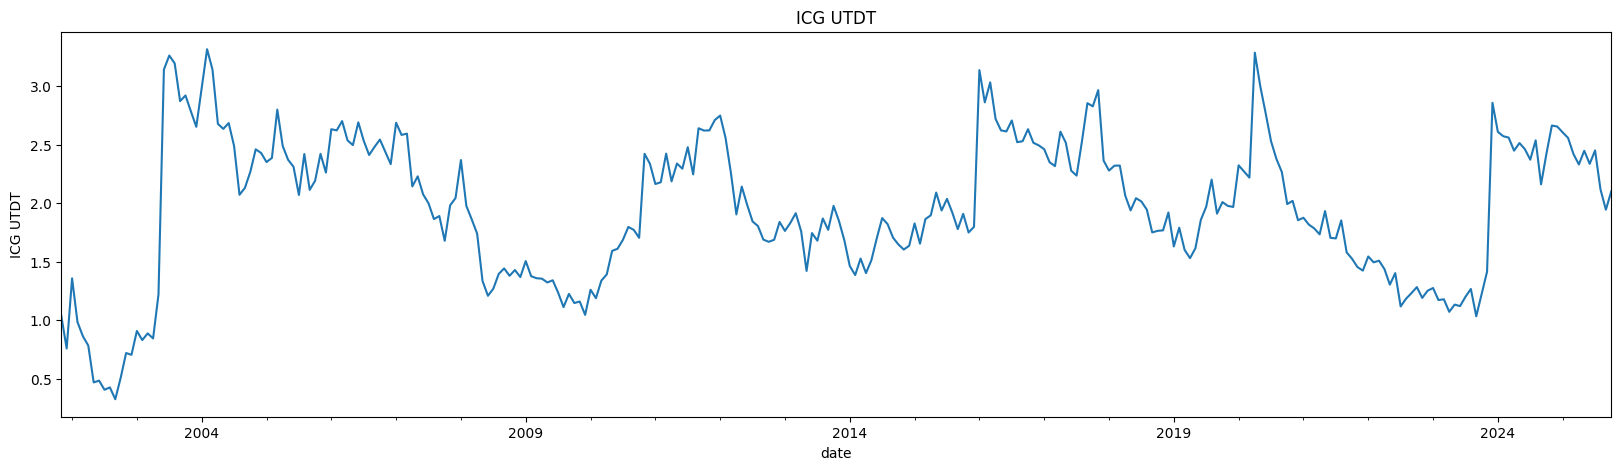

In [67]:
data3.plot(figsize=(20,5), title = "ICG UTDT", ylabel = "ICG UTDT", xlabel = "date")
plt.show()

En este apartado se presentan las siguientes series, en orden:

- Ag Barometer AR
- Ag Barometer USA
- ICG

La primera parece tener una componente de tendencia, aparentemente lineal, lo que implicaría que la serie no es estacionaria. Pero al tener esta leve tendencia y, visualmente, no notarse ciclos, con una diferenciación tal vez pueda ser necesario para hacer a la misma estacionaria.

Para Ag Baromemter USA, la seria aparenta ser estacionaria. Tal vez puede existir una leve componente de tendencia o alguna variación en variabilidad pero, a priori, se asemeja mucho a una estacionaria. Para ese caso no necesitariamos diferenciación.

Por otro lado, tenemos el ICG, que a simple vista no parece ser estacionaria. Si bien podriamos pensar en cierta oscilación sobre una valor medio, parece tener ciclos de picos y valles, con saltos absolutos marcados sobre años de elecciones presidenciales. En este caso, una prueba a hacer sería diferenciar entre los valores del ciclo, para reducir dicha estacionalidad.

# 3 Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría. 

In [68]:
# Grafica de ACF, PACF y autocovarianza
def graficar_acf_pacf_autocovarianza(data, lags=10):
    Y = data.values

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))


    sm.graphics.tsa.plot_acf(Y, lags=lags, ax=ax[0])
    ax[0].set_title('Funcion de autocorrelación (ACF)')

    sm.graphics.tsa.plot_pacf(Y, lags=lags, ax=ax[1])
    ax[1].set_title('Funcion de autocorrelación Parcial (grafico introductorio) (PACF)')

    def autocovariance(series, lag):
        series_mean = np.mean(series)
        n = len(series)
        return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

    lags = np.arange(lags)
    autocov = [autocovariance(Y, lag) for lag in lags]

    ax[2].stem(lags, autocov)
    ax[2].set_title('Autocovarianza')
    ax[2].set_xlabel('Lag')
    ax[2].set_ylabel('Autocovarianza')

    plt.tight_layout();
    plt.show();

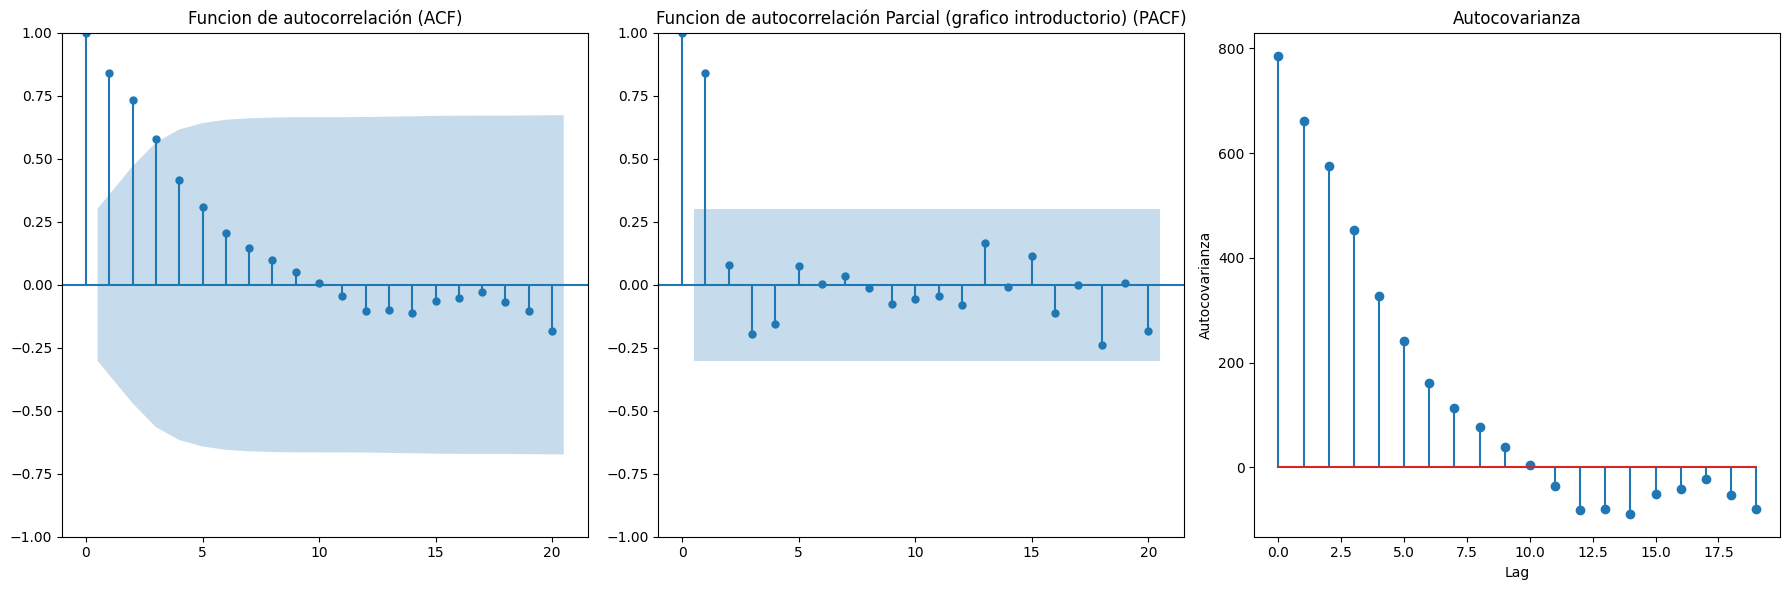

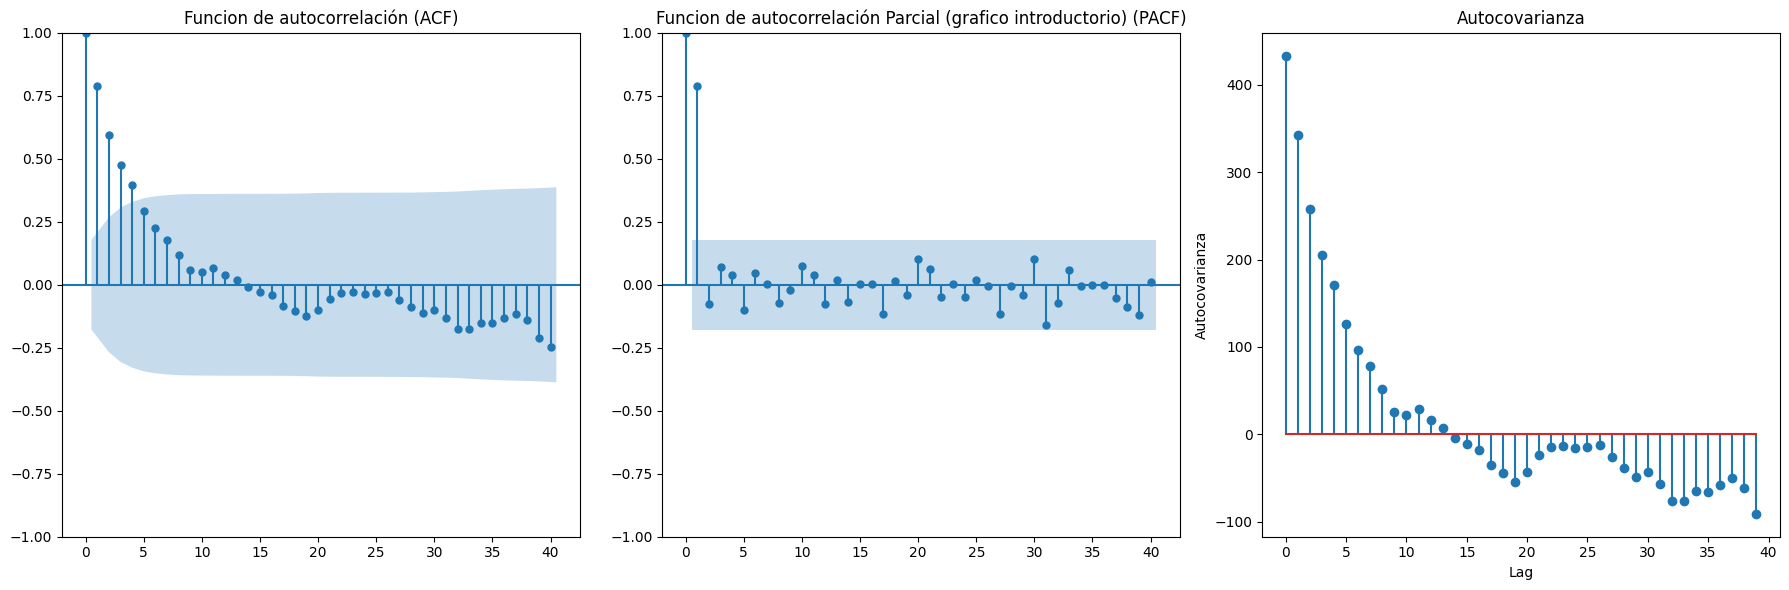

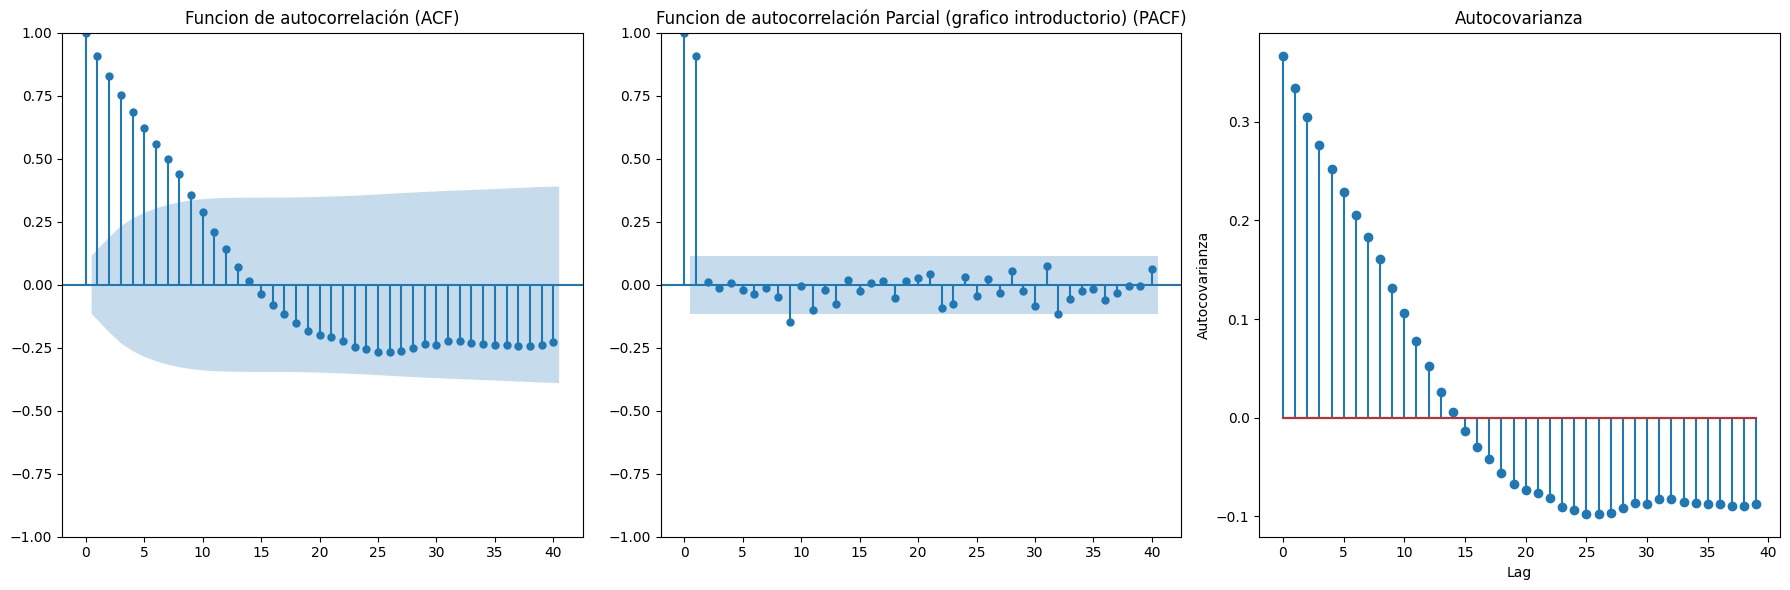

In [69]:
graficar_acf_pacf_autocovarianza(data1, lags=20)
graficar_acf_pacf_autocovarianza(data2, lags=40)
graficar_acf_pacf_autocovarianza(data3, lags=40)

En el caso del Ag Barometer AR podemos ver un decaimiento que aparenta ser lineal, lo que ya nos puede hacer pensar en que no tenemos estacionariedad. A su vez, vemos una fuerte autocorrelación parcial con el primer rezago, haciendonos pensar en una componente autorregresiva de orden 1.

El caso del Ag Barometer USA podría indicarnos una serie estacionaria, donde se nota un decaimiento exponencial en el correlograma, con memoria relativamente corta. A su vez, otra vez visualizando la autocorrelación parcial, podemos pensar en una autocorrelación de orden 1. Con todo esto, pensamos que un primer modelo de aproximación podría ser un AR(1)

Para el caso del ICG, vemos más una caida lineal de la autocorrelación y algunos rezagos estadísticamente significativos en la autocorrelación parcial. Este es el caso más dificil de interpretar, ya que la supuesta estacionalidad marcada tampoco se ve muy notoriamente en estos gráficos

In [70]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

In [71]:
print_test_afd(data1)
print_test_afd(data2)
print_test_afd(data3)

Estadistico ADF: -0.959246
p-valor: 0.767837
Valores criticos:
	1%: -3.627
	5%: -2.946
	10%: -2.612
Estadistico ADF: -3.727040
p-valor: 0.003748
Valores criticos:
	1%: -3.486
	5%: -2.886
	10%: -2.580
Estadistico ADF: -3.752162
p-valor: 0.003436
Valores criticos:
	1%: -3.453
	5%: -2.872
	10%: -2.572


Recordando que el test de Dickey-Fuller involucra:

- H0: existencia de raiz unitaria
- Ha: no existencia de raiz unitaria

Dados los p valores de los test a las 3 series, podemos decir que:

- Para AG Barometer AR, no podemos rechazar la H0, o sea, la no estacionariedad
- Para AG Barometer USA e ICG, se presenta evidencia estadística para rechazar H0 y afirmar que presentan estacionariedad

# 4 Planteo de modelos

## 4.1 Ag Barometer AR